In [793]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import warnings
warnings.filterwarnings('ignore')
import seaborn as sns

from sklearn.preprocessing import StandardScaler

from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score

from sklearn.externals import joblib

In [794]:
train=pd.read_csv('E:\\doctorfees_train.csv',encoding='latin1')
test=pd.read_csv('E:\\doctorfees_test.csv',encoding='latin1')

In [795]:
#combining both train and test data sets into one to perform feature engineering and then divide them later again. 
#This saves the trouble of performing the same steps twice on test and train. 


In [796]:
#Creating a new column['source] which will specify which observation belongs to test and which observation belongs to train.
#this will also help us separating both the datasets later after we perform feature engineering just by one line code.
train['source']=1
test['source']=0

In [797]:
df= pd.concat([train, test])#axis=0(default)rowwise
print (train.shape, test.shape, df.shape)

(5961, 8) (1987, 7) (7948, 8)


In [798]:
df.head()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,source
0,24 years experience,100.0,"100% 16 Feedback Kakkanad, Ernakulam","Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,1
1,12 years experience,350.0,"98% 76 Feedback Whitefield, Bangalore","Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,1
2,9 years experience,300.0,NaN,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",NaN,1
3,12 years experience,250.0,"Bannerghatta Road, Bangalore ?250 Available on...","Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",NaN,1
4,20 years experience,250.0,"100% 4 Feedback Keelkattalai, Chennai","Keelkattalai, Chennai",Ayurveda,BAMS,100%,1


In [799]:
#Price is the target variable and all values are missing as they are from test set. 
#we’ll impute all the missing values(if present) except the Price column.
df.tail()

,Experience,Fees,Miscellaneous_Info,Place,Profile,Qualification,Rating,source
1982,10 years experience,NaN,NaN,"Basavanagudi, Bangalore",Ayurveda,"BAMS, Doctor of Medicine",NaN,0
1983,4 years experience,NaN,NaN,"Choolai, Chennai",Dermatologists,"MD - Dermatology , Venereology & Leprosy, MBBS",NaN,0
1984,9 years experience,NaN,NaN,"Porur, Chennai",General Medicine,"MBBS, MD / MS - Obstetrics & Gynaecology",NaN,0
1985,12 years experience,NaN,RCT - Root Canal Treatment Root Canal Treatmen...,"Arekere, Bangalore",Dentist,BDS,98%,0
1986,8 years experience,NaN,"1 Feedback Pallikaranai, Chennai ?500","Pallikaranai, Chennai",Dermatologists,"MBBS, MD - Dermatology , Venereology & Leprosy",NaN,0


In [800]:
df.shape

(7948, 8)

In [801]:
df.dtypes

Experience             object
Fees                  float64
Miscellaneous_Info     object
Place                  object
Profile                object
Qualification          object
Rating                 object
source                  int64
dtype: object

In [802]:
categorical_features=[feature for feature in df.columns if df[feature].dtypes=='object']
for feature in categorical_features:
    if df[feature].nunique()>=1:
        print(feature,df[feature].nunique())

Experience 64
Miscellaneous_Info 3980
Place 948
Profile 6
Qualification 1801
Rating 52


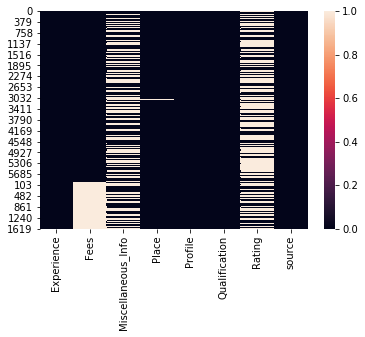

In [803]:
sns.heatmap(df.isnull())#There are many missing values in the dataset.

In [804]:
df.isnull().sum()

Experience               0
Fees                  1987
Miscellaneous_Info    3454
Place                   31
Profile                  0
Qualification            0
Rating                4392
source                   0
dtype: int64

# Feature engineering

# imputing missing values

In [805]:
df.isnull().sum()#we can see almost 40-50% values in Miscellaneous_Info are missing values,we will drop this column.

Experience               0
Fees                  1987
Miscellaneous_Info    3454
Place                   31
Profile                  0
Qualification            0
Rating                4392
source                   0
dtype: int64

In [806]:
#Dropping Miscellaneous_Info feature as it has too much missing values
df=df.drop('Miscellaneous_Info',axis=1)

In [807]:
#Imputing missing values except the target column(Fees) a the missing values are from test set.

#Creating a different class 'unknown' for all the missing values in the 'Place' feature.
#Instead of imputing with mean,mode,median we are taking this approach here.
df['Place']=df['Place'].fillna('unknown')

In [808]:
#Creating a different class '-99%' for all the missing values in the 'Rating' feature.
#Instead of imputing with mean,mode,median we are taking this approach here.
df['Rating']=df['Rating'].fillna('-99%')

In [809]:
#we dont have to worry about the missing values in Fees.
df.isnull().sum()

Experience          0
Fees             1987
Place               0
Profile             0
Qualification       0
Rating              0
source              0
dtype: int64

# Feature Generation

# 1-Experience

In [810]:
df["Experience"] = df["Experience"].str.split()
df["Experience"] = df["Experience"].str[0].astype("int")

In [811]:
df.head()

,Experience,Fees,Place,Profile,Qualification,Rating,source
0,24,100.0,"Kakkanad, Ernakulam",Homeopath,"BHMS, MD - Homeopathy",100%,1
1,12,350.0,"Whitefield, Bangalore",Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,1
2,9,300.0,"Mathikere - BEL, Bangalore",ENT Specialist,"MBBS, MS - Otorhinolaryngology",-99%,1
3,12,250.0,"Bannerghatta Road, Bangalore",Ayurveda,"BSc - Zoology, BAMS",-99%,1
4,20,250.0,"Keelkattalai, Chennai",Ayurveda,BAMS,100%,1


# 2-Place

In [812]:
df["Place"] = df["Place"].str.split(",")
df['Place'][:5]

0             [Kakkanad,  Ernakulam]
1           [Whitefield,  Bangalore]
2      [Mathikere - BEL,  Bangalore]
3    [Bannerghatta Road,  Bangalore]
4           [Keelkattalai,  Chennai]
Name: Place, dtype: object

In [813]:
#Creating a new feature 'City' which will contain the city to which the doctor belongs.
df["City"] = df["Place"].str[-1]

#Changing the original feature 'Place' which contains the Area in which the doctor operates. 
df["Area"] = df["Place"].str[0]

In [814]:
#dropping the original column as we have extracted the features from it.
df=df.drop('Place',axis=1)

In [815]:
df.head()

,Experience,Fees,Profile,Qualification,Rating,source,City,Area
0,24,100.0,Homeopath,"BHMS, MD - Homeopathy",100%,1,Ernakulam,Kakkanad
1,12,350.0,Ayurveda,"BAMS, MD - Ayurveda Medicine",98%,1,Bangalore,Whitefield
2,9,300.0,ENT Specialist,"MBBS, MS - Otorhinolaryngology",-99%,1,Bangalore,Mathikere - BEL
3,12,250.0,Ayurveda,"BSc - Zoology, BAMS",-99%,1,Bangalore,Bannerghatta Road
4,20,250.0,Ayurveda,BAMS,100%,1,Chennai,Keelkattalai


In [816]:
df['City'].value_counts()

 Bangalore             1678
 Mumbai                1608
 Delhi                 1602
 Hyderabad             1284
 Chennai               1142
 Coimbatore             298
 Ernakulam              201
 Thiruvananthapuram     103
unknown                  31
e                         1
Name: City, dtype: int64

In [817]:
df['City']=df['City'].replace('e','unknown')
df['Area']=df['Area'].replace('e','unknown')

In [818]:
df['City'].value_counts()

 Bangalore             1678
 Mumbai                1608
 Delhi                 1602
 Hyderabad             1284
 Chennai               1142
 Coimbatore             298
 Ernakulam              201
 Thiruvananthapuram     103
unknown                  32
Name: City, dtype: int64

In [819]:
df['Area'].value_counts()

HSR Layout       97
Andheri West     97
Dwarka           94
Banjara Hills    85
Mulund West      81
                 ..
Film Nagar        1
Kovaipudur        1
Meera Bagh        1
Falaknuma         1
Nampally          1
Name: Area, Length: 937, dtype: int64

# 3-Rating

In [820]:
df['Rating'] = df['Rating'].str[:-1].astype("int")
df['Rating'][:5]

0    100
1     98
2    -99
3    -99
4    100
Name: Rating, dtype: int32

In [821]:
#Creating bins/categories according to their rating,(-99 to 0)-->Missing values ,10-->Best rating(91 to 100)

bins = [-99,0,10,20,30,40,50,60,70,80,90,100]
labels = [i for i in range(0,11)]
df['Rating'] = pd.cut(df['Rating'],bins=bins,labels=labels,include_lowest=True)

In [822]:
df.head()

,Experience,Fees,Profile,Qualification,Rating,source,City,Area
0,24,100.0,Homeopath,"BHMS, MD - Homeopathy",10,1,Ernakulam,Kakkanad
1,12,350.0,Ayurveda,"BAMS, MD - Ayurveda Medicine",10,1,Bangalore,Whitefield
2,9,300.0,ENT Specialist,"MBBS, MS - Otorhinolaryngology",0,1,Bangalore,Mathikere - BEL
3,12,250.0,Ayurveda,"BSc - Zoology, BAMS",0,1,Bangalore,Bannerghatta Road
4,20,250.0,Ayurveda,BAMS,10,1,Chennai,Keelkattalai


In [823]:
categorical_features_new=[feature for feature in df.columns if df[feature].dtypes=='object']
for feature in categorical_features_new:
    if df[feature].nunique()>=1:
        print(feature,df[feature].nunique())

Profile 6
Qualification 1801
City 9
Area 937


# 4-Qualification

In [824]:
df['Qualification'].value_counts()

BDS                                                                                   632
BHMS                                                                                  627
BAMS                                                                                  624
MBBS                                                                                  441
MBBS, MS - ENT                                                                        280
                                                                                     ... 
BAMS, Diploma in Health Administration                                                  1
DNB - Dermatology & Venereology                                                         1
BDS, MDS - Periodontology and Oral Implantology, Master of Oral Laser Applications      1
BHMS, MD - Homeo Organon                                                                1
MBBS, MS - General Surgery, DNB - ENT                                                   1
Name: Qual

In [825]:
df["Qualification"]=df["Qualification"].str.split(",")
Qualification ={}
for x in df["Qualification"].values:
    for each in x:
        each = each.strip()
        if each in Qualification:
            Qualification[each]+=1
        else:
            Qualification[each]=1

In [826]:
df['Qualification']

0                                [BHMS,  MD - Homeopathy]
1                         [BAMS,  MD - Ayurveda Medicine]
2                       [MBBS,  MS - Otorhinolaryngology]
3                                  [BSc - Zoology,  BAMS]
4                                                  [BAMS]
                              ...                        
1982                          [BAMS,  Doctor of Medicine]
1983    [MD - Dermatology ,  Venereology & Leprosy,  M...
1984          [MBBS,  MD / MS - Obstetrics & Gynaecology]
1985                                                [BDS]
1986    [MBBS,  MD - Dermatology ,  Venereology & Lepr...
Name: Qualification, Length: 7948, dtype: object

In [827]:
df['Qualification'].values

array([list(['BHMS', ' MD - Homeopathy']),
       list(['BAMS', ' MD - Ayurveda Medicine']),
       list(['MBBS', ' MS - Otorhinolaryngology']), ...,
       list(['MBBS', ' MD / MS - Obstetrics & Gynaecology']),
       list(['BDS']),
       list(['MBBS', ' MD - Dermatology ', ' Venereology & Leprosy'])],
      dtype=object)

In [828]:
most_qua = sorted(Qualification.items(),key=lambda x:x[1],reverse=True)[:10]
final_qua =[]
for tup in most_qua:
    final_qua.append(tup[0])

In [829]:
Qualification.items()

dict_items([('BHMS', 998), ('MD - Homeopathy', 243), ('BAMS', 1007), ('MD - Ayurveda Medicine', 180), ('MBBS', 3788), ('MS - Otorhinolaryngology', 145), ('BSc - Zoology', 4), ('BDS', 1791), ('MD - General Medicine', 384), ('BSc', 6), ('MS', 2), ('DNB - ENT', 150), ('MDS', 103), ('MDS - Oral & Maxillofacial Surgery', 136), ('Diploma in Otorhinolaryngology (DLO)', 335), ('MF- Homeopathy', 6), ('MS - ENT', 539), ('DNB', 77), ('Fellowship of College of General Practice (FCGP)', 15), ('DDVL', 228), ('IBCLC (USA)', 1), ('Post Graduate Diploma in Diabetology (PGDD)', 78), ('Diploma in Dermatology', 86), ('Fellowship in Aesthetic Medicine', 28), ('DM - Neurology', 7), ('MD - Pediatrics', 15), ('Fellowship in Cleft Lip and Craniofacial Surgery', 1), ('Diploma in Cosmetology', 8), ('AFIH', 7), ('MDS - Prosthodontist And Crown Bridge', 66), ('M. D. Hom. (Practice of Medicine)', 2), ('Diploma in Emergency Medicine', 12), ('Diploma in Counselling Skills', 2), ('DHMS (Diploma in Homeopathic Medicine

In [830]:
most_qua

[('MBBS', 3788),
 ('BDS', 1791),
 ('BAMS', 1007),
 ('BHMS', 998),
 ('MD - Dermatology', 802),
 ('MS - ENT', 539),
 ('Venereology & Leprosy', 388),
 ('MD - General Medicine', 384),
 ('Diploma in Otorhinolaryngology (DLO)', 335),
 ('MD - Homeopathy', 243)]

In [831]:
final_qua

['MBBS',
 'BDS',
 'BAMS',
 'BHMS',
 'MD - Dermatology',
 'MS - ENT',
 'Venereology & Leprosy',
 'MD - General Medicine',
 'Diploma in Otorhinolaryngology (DLO)',
 'MD - Homeopathy']

In [833]:
for title in final_qua:
    df[title]=0
    
for x,y in zip(df['Qualification'].values,np.array([idx for idx in range(len(df))])):
    for q in x:
        q = q.strip()
        if q in final_qua:
            df[q][y] = 1
#This code gives the dummies for the final_qua(Top 10 qualifications)

In [834]:
df.drop("Qualification",axis=1,inplace=True)

# EDA

# Univariate Analysis

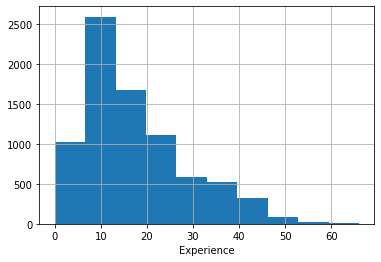

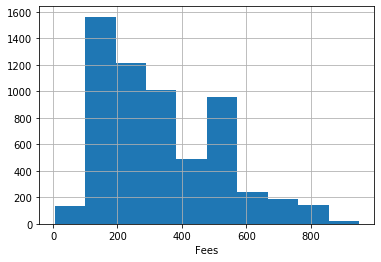

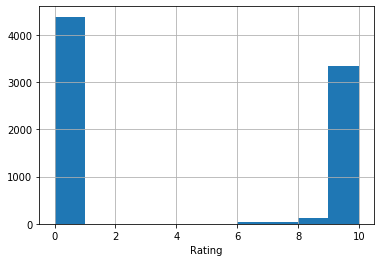

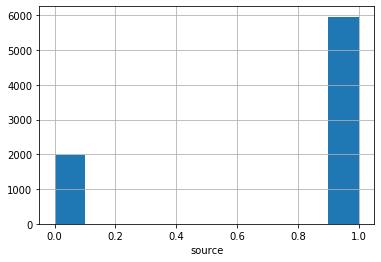

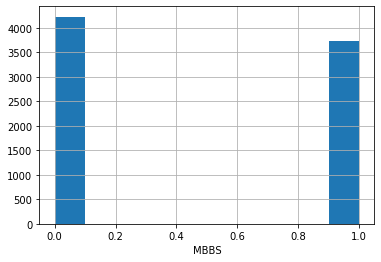

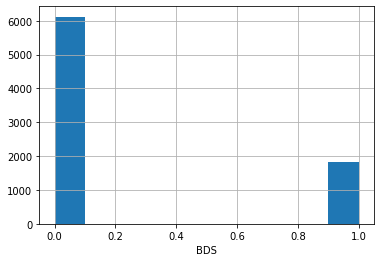

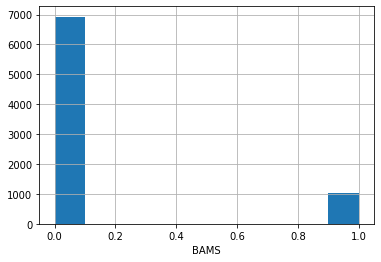

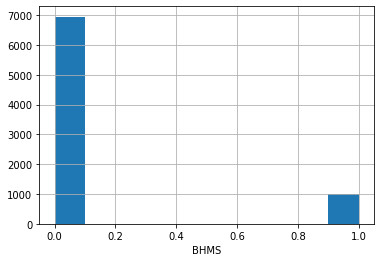

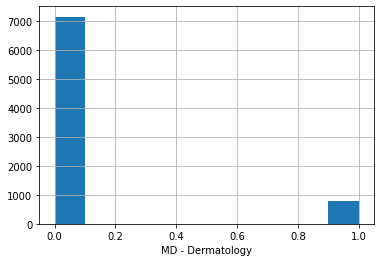

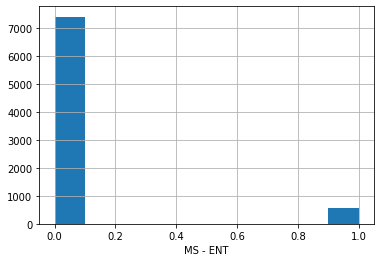

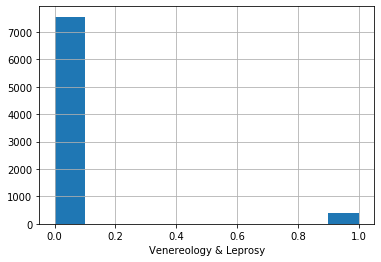

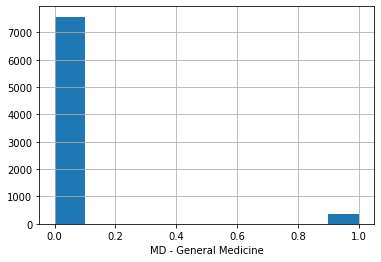

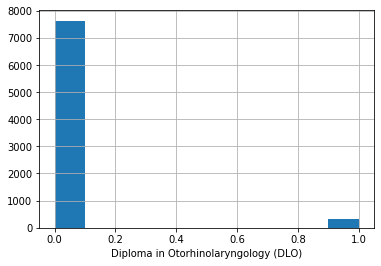

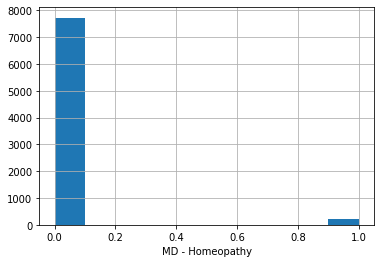

In [835]:
#checking skewness
numerical_features=[feature for feature in df.columns if df[feature].dtypes!='object']
for feature in numerical_features:
    
    df[feature].hist()
    plt.xlabel(feature)
    plt.show()

In [836]:
#We can see data are right skewed,which are to be treated

In [838]:
df.head()

,Experience,Fees,Profile,Rating,source,City,Area,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
0,24,100.0,Homeopath,10,1,Ernakulam,Kakkanad,0,0,0,1,0,0,0,0,0,1
1,12,350.0,Ayurveda,10,1,Bangalore,Whitefield,0,0,1,0,0,0,0,0,0,0
2,9,300.0,ENT Specialist,0,1,Bangalore,Mathikere - BEL,1,0,0,0,0,0,0,0,0,0
3,12,250.0,Ayurveda,0,1,Bangalore,Bannerghatta Road,0,0,1,0,0,0,0,0,0,0
4,20,250.0,Ayurveda,10,1,Chennai,Keelkattalai,0,0,1,0,0,0,0,0,0,0


In [839]:
df.tail()

,Experience,Fees,Profile,Rating,source,City,Area,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,MD - General Medicine,Diploma in Otorhinolaryngology (DLO),MD - Homeopathy
1982,10,NaN,Ayurveda,0,0,Bangalore,Basavanagudi,0,0,1,0,0,0,0,0,0,0
1983,4,NaN,Dermatologists,0,0,Chennai,Choolai,1,0,0,0,1,0,0,0,0,0
1984,9,NaN,General Medicine,0,0,Chennai,Porur,0,0,0,1,0,0,0,0,0,1
1985,12,NaN,Dentist,10,0,Bangalore,Arekere,1,0,0,0,0,1,0,0,0,0
1986,8,NaN,Dermatologists,0,0,Chennai,Pallikaranai,1,0,0,0,0,0,0,0,0,0


# Dummies

In [840]:
df=pd.concat([df,pd.get_dummies(df['City'],prefix='City',prefix_sep='_')],axis=1)
df=pd.concat([df,pd.get_dummies(df['Profile'],prefix='Profile',prefix_sep='_')],axis=1)

In [841]:
df.shape

(7948, 32)

In [842]:
df.tail()

,Experience,Fees,Profile,Rating,source,City,Area,MBBS,BDS,BAMS,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
1982,10,NaN,Ayurveda,0,0,Bangalore,Basavanagudi,0,0,1,...,0,0,0,0,1,0,0,0,0,0
1983,4,NaN,Dermatologists,0,0,Chennai,Choolai,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1984,9,NaN,General Medicine,0,0,Chennai,Porur,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1985,12,NaN,Dentist,10,0,Bangalore,Arekere,1,0,0,...,0,0,0,0,0,1,0,0,0,0
1986,8,NaN,Dermatologists,0,0,Chennai,Pallikaranai,1,0,0,...,0,0,0,0,0,0,1,0,0,0


In [843]:
df=df.drop(['Profile','City'],axis=1)

In [844]:
df.shape

(7948, 30)

In [845]:
df.tail()

,Experience,Fees,Rating,source,Area,MBBS,BDS,BAMS,BHMS,MD - Dermatology,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
1982,10,NaN,0,0,Basavanagudi,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
1983,4,NaN,0,0,Choolai,1,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
1984,9,NaN,0,0,Porur,0,0,0,1,0,...,0,0,0,0,0,0,0,0,1,0
1985,12,NaN,10,0,Arekere,1,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1986,8,NaN,0,0,Pallikaranai,1,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


In [846]:
df.head()

,Experience,Fees,Rating,source,Area,MBBS,BDS,BAMS,BHMS,MD - Dermatology,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,100.0,10,1,Kakkanad,0,0,0,1,0,...,0,0,0,0,0,0,0,0,0,1
1,12,350.0,10,1,Whitefield,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,300.0,0,1,Mathikere - BEL,1,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,250.0,0,1,Bannerghatta Road,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,250.0,10,1,Keelkattalai,0,0,1,0,0,...,0,0,0,0,1,0,0,0,0,0


# separating training and testing datasets

In [847]:
train = df.loc[df['source']==1]
test = df.loc[df['source']==0]

In [848]:
train.shape , test.shape

((5961, 30), (1987, 30))

In [849]:
y=train['Fees']
train=train.drop(['source','Fees'],axis=1)
test=test.drop(['source','Fees'],axis=1)

In [850]:
train.shape , test.shape

((5961, 28), (1987, 28))

# Label encoding

In [851]:
from sklearn.preprocessing import LabelEncoder
le=LabelEncoder()


In [852]:
train['Area']=le.fit_transform(train['Area'])

In [853]:
train.head()

,Experience,Rating,Area,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,24,10,296,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
1,12,10,855,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
2,9,0,452,1,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,12,0,68,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
4,20,10,335,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0


In [854]:
test['Area']=le.fit_transform(test['Area'])

In [855]:
test.tail()

,Experience,Rating,Area,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
1982,10,0,58,0,0,1,0,0,0,0,...,0,0,0,0,1,0,0,0,0,0
1983,4,0,96,1,0,0,0,1,0,0,...,0,0,0,0,0,0,1,0,0,0
1984,9,0,423,0,0,0,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
1985,12,10,26,1,0,0,0,0,1,0,...,0,0,0,0,0,1,0,0,0,0
1986,8,0,393,1,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0


# Feature Engineering part-2

In [856]:
train.skew()

Experience                               0.991089
Rating                                   0.240670
Area                                     0.112793
MBBS                                     0.118000
BDS                                      1.293695
BAMS                                     2.229777
BHMS                                     2.261706
MD - Dermatology                         2.639954
MS - ENT                                 3.403459
Venereology & Leprosy                    4.171950
MD - General Medicine                    4.239699
Diploma in Otorhinolaryngology (DLO)     4.581912
MD - Homeopathy                          5.475409
City_ Bangalore                          1.416677
City_ Chennai                            2.035059
City_ Coimbatore                         4.816241
City_ Delhi                              1.509849
City_ Ernakulam                          6.000437
City_ Hyderabad                          1.860027
City_ Mumbai                             1.465681


In [857]:
test.skew()

Experience                               0.963447
Rating                                   0.218225
Area                                     0.038172
MBBS                                     0.150512
BDS                                      1.254073
BAMS                                     2.197496
BHMS                                     2.251349
MD - Dermatology                         2.792462
MS - ENT                                 3.420736
Venereology & Leprosy                    4.241835
MD - General Medicine                    4.348759
Diploma in Otorhinolaryngology (DLO)     4.891437
MD - Homeopathy                          6.421914
City_ Bangalore                          1.414921
City_ Chennai                            2.024439
City_ Coimbatore                         5.045856
City_ Delhi                              1.426066
City_ Ernakulam                          6.203118
City_ Hyderabad                          1.781316
City_ Mumbai                             1.534586


# Applying Power transformation to remove skewness in training set

In [858]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
train_power=pt.fit_transform(train)
train=pd.DataFrame(train_power,columns=train.columns)

In [859]:
train.head()

,Experience,Rating,Area,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,0.737357,1.130346,-0.310260,-0.942753,-0.544198,-0.382840,2.639934,-0.336091,-0.272129,-0.227363,...,-0.435684,-0.507015,-0.120989,-0.066188,-0.389723,-0.553255,-0.458109,-0.372984,-0.494962,2.463975
1,-0.325180,1.130346,1.506824,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,-0.227363,...,-0.435684,-0.507015,-0.120989,-0.066188,2.565925,-0.553255,-0.458109,-0.372984,-0.494962,-0.405848
2,-0.688374,-0.896789,0.273180,1.060723,-0.544198,-0.382840,-0.378797,-0.336091,-0.272129,-0.227363,...,-0.435684,-0.507015,-0.120989,-0.066188,-0.389723,-0.553255,-0.458109,2.681079,-0.494962,-0.405848
3,-0.325180,-0.896789,-1.459573,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,-0.227363,...,-0.435684,-0.507015,-0.120989,-0.066188,2.565925,-0.553255,-0.458109,-0.372984,-0.494962,-0.405848
4,0.430174,1.130346,-0.155533,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,-0.227363,...,-0.435684,-0.507015,-0.120989,-0.066188,2.565925,-0.553255,-0.458109,-0.372984,-0.494962,-0.405848


# Applying Power transformation to remove skewness in test set

In [860]:
from sklearn.preprocessing import PowerTransformer
pt=PowerTransformer(method='yeo-johnson') 
test_power=pt.fit_transform(test)
test=pd.DataFrame(test_power,columns=test.columns)

In [861]:
test.shape

(1987, 28)

In [862]:
test.head()

,Experience,Rating,Area,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,1.390704,-0.906720,-0.765058,-0.927624,-0.553514,-0.387149,2.629893,-0.321366,-0.271061,-0.224079,...,-0.448698,2.026813,-0.092895,-0.055034,-0.380244,-0.534090,-0.453546,-0.366241,1.864196,-0.402478
1,1.151178,-0.906720,1.477294,-0.927624,-0.553514,2.582986,-0.380244,-0.321366,-0.271061,-0.224079,...,2.228669,-0.493386,-0.092895,-0.055034,-0.380244,-0.534090,-0.453546,2.730443,-0.536424,-0.402478
2,1.667308,0.914720,-0.323759,1.078023,-0.553514,-0.387149,-0.380244,-0.321366,-0.271061,-0.224079,...,-0.448698,-0.493386,-0.092895,-0.055034,-0.380244,-0.534090,2.204849,-0.366241,-0.536424,-0.402478
3,-2.781679,-0.906720,0.541738,-0.927624,-0.553514,2.582986,-0.380244,-0.321366,-0.271061,-0.224079,...,-0.448698,-0.493386,-0.092895,-0.055034,2.629893,-0.534090,-0.453546,-0.366241,-0.536424,-0.402478
4,0.025681,1.118926,-0.212630,-0.927624,-0.553514,2.582986,-0.380244,-0.321366,-0.271061,-0.224079,...,-0.448698,-0.493386,-0.092895,-0.055034,-0.380244,1.872343,-0.453546,-0.366241,-0.536424,-0.402478


In [863]:
train.skew()

Experience                               0.000692
Rating                                   0.220369
Area                                    -0.266799
MBBS                                     0.118000
BDS                                      1.293695
BAMS                                     2.229777
BHMS                                     2.261706
MD - Dermatology                         2.639954
MS - ENT                                 3.403459
Venereology & Leprosy                    4.171950
MD - General Medicine                    4.239699
Diploma in Otorhinolaryngology (DLO)     4.581912
MD - Homeopathy                          5.475409
City_ Bangalore                          1.416677
City_ Chennai                            2.035059
City_ Coimbatore                         4.816241
City_ Delhi                              1.509849
City_ Ernakulam                          6.000437
City_ Hyderabad                          1.860027
City_ Mumbai                             1.465681


In [864]:
test.skew()

Experience                               0.000965
Rating                                   0.198081
Area                                    -0.285988
MBBS                                     0.150512
BDS                                      1.254073
BAMS                                     2.197496
BHMS                                     2.251349
MD - Dermatology                         2.792462
MS - ENT                                 3.420736
Venereology & Leprosy                    4.241835
MD - General Medicine                    4.348759
Diploma in Otorhinolaryngology (DLO)     4.891437
MD - Homeopathy                          6.421914
City_ Bangalore                          1.414921
City_ Chennai                            2.024439
City_ Coimbatore                         5.045856
City_ Delhi                              1.426066
City_ Ernakulam                          6.203118
City_ Hyderabad                          1.781316
City_ Mumbai                             1.534586


In [865]:
train.shape,test.shape

((5961, 28), (1987, 28))

# Data Scaling 

In [866]:
#Applying Standard scalar to independent variable only of training dataset
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
train_scaled=ss.fit_transform(train)
train_scaled=pd.DataFrame(data=train_scaled,columns=train.columns)


In [867]:
train_scaled.head()

,Experience,Rating,Area,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,0.737357,1.130346,-0.310260,-0.942753,-0.544198,-0.382840,2.639934,-0.336091,-0.272129,-0.227363,...,-0.435684,-0.507015,-0.120989,-0.066188,-0.389723,-0.553255,-0.458109,-0.372984,-0.494962,2.463975
1,-0.325180,1.130346,1.506824,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,-0.227363,...,-0.435684,-0.507015,-0.120989,-0.066188,2.565925,-0.553255,-0.458109,-0.372984,-0.494962,-0.405848
2,-0.688374,-0.896789,0.273180,1.060723,-0.544198,-0.382840,-0.378797,-0.336091,-0.272129,-0.227363,...,-0.435684,-0.507015,-0.120989,-0.066188,-0.389723,-0.553255,-0.458109,2.681079,-0.494962,-0.405848
3,-0.325180,-0.896789,-1.459573,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,-0.227363,...,-0.435684,-0.507015,-0.120989,-0.066188,2.565925,-0.553255,-0.458109,-0.372984,-0.494962,-0.405848
4,0.430174,1.130346,-0.155533,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,-0.227363,...,-0.435684,-0.507015,-0.120989,-0.066188,2.565925,-0.553255,-0.458109,-0.372984,-0.494962,-0.405848


In [868]:
train=pd.concat([y,train_scaled],axis=1)

In [869]:
train.head()

,Fees,Experience,Rating,Area,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,100.0,0.737357,1.130346,-0.310260,-0.942753,-0.544198,-0.382840,2.639934,-0.336091,-0.272129,...,-0.435684,-0.507015,-0.120989,-0.066188,-0.389723,-0.553255,-0.458109,-0.372984,-0.494962,2.463975
1,350.0,-0.325180,1.130346,1.506824,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,...,-0.435684,-0.507015,-0.120989,-0.066188,2.565925,-0.553255,-0.458109,-0.372984,-0.494962,-0.405848
2,300.0,-0.688374,-0.896789,0.273180,1.060723,-0.544198,-0.382840,-0.378797,-0.336091,-0.272129,...,-0.435684,-0.507015,-0.120989,-0.066188,-0.389723,-0.553255,-0.458109,2.681079,-0.494962,-0.405848
3,250.0,-0.325180,-0.896789,-1.459573,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,...,-0.435684,-0.507015,-0.120989,-0.066188,2.565925,-0.553255,-0.458109,-0.372984,-0.494962,-0.405848
4,250.0,0.430174,1.130346,-0.155533,-0.942753,-0.544198,2.612056,-0.378797,-0.336091,-0.272129,...,-0.435684,-0.507015,-0.120989,-0.066188,2.565925,-0.553255,-0.458109,-0.372984,-0.494962,-0.405848


In [870]:
#Applying Standard scalar to test dataset
from sklearn.preprocessing import StandardScaler
ss=StandardScaler()
test_scaled=ss.fit_transform(test)
test=pd.DataFrame(data=test_scaled,columns=test.columns)


In [871]:
test.head()

,Experience,Rating,Area,MBBS,BDS,BAMS,BHMS,MD - Dermatology,MS - ENT,Venereology & Leprosy,...,City_ Hyderabad,City_ Mumbai,City_ Thiruvananthapuram,City_unknown,Profile_Ayurveda,Profile_Dentist,Profile_Dermatologists,Profile_ENT Specialist,Profile_General Medicine,Profile_Homeopath
0,1.390704,-0.906720,-0.765058,-0.927624,-0.553514,-0.387149,2.629893,-0.321366,-0.271061,-0.224079,...,-0.448698,2.026813,-0.092895,-0.055034,-0.380244,-0.534090,-0.453546,-0.366241,1.864196,-0.402478
1,1.151178,-0.906720,1.477294,-0.927624,-0.553514,2.582986,-0.380244,-0.321366,-0.271061,-0.224079,...,2.228669,-0.493386,-0.092895,-0.055034,-0.380244,-0.534090,-0.453546,2.730443,-0.536424,-0.402478
2,1.667308,0.914720,-0.323759,1.078023,-0.553514,-0.387149,-0.380244,-0.321366,-0.271061,-0.224079,...,-0.448698,-0.493386,-0.092895,-0.055034,-0.380244,-0.534090,2.204849,-0.366241,-0.536424,-0.402478
3,-2.781679,-0.906720,0.541738,-0.927624,-0.553514,2.582986,-0.380244,-0.321366,-0.271061,-0.224079,...,-0.448698,-0.493386,-0.092895,-0.055034,2.629893,-0.534090,-0.453546,-0.366241,-0.536424,-0.402478
4,0.025681,1.118926,-0.212630,-0.927624,-0.553514,2.582986,-0.380244,-0.321366,-0.271061,-0.224079,...,-0.448698,-0.493386,-0.092895,-0.055034,-0.380244,1.872343,-0.453546,-0.366241,-0.536424,-0.402478


# Model Building

In [872]:
y=train['Fees']
x=train.drop(['Fees'],axis=1)

In [873]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from xgboost import XGBRegressor

In [874]:
knn=KNeighborsRegressor()
svr=SVR()
lr=LinearRegression()
dt=DecisionTreeRegressor()
gbm=GradientBoostingRegressor()
ada=AdaBoostRegressor()
rfr=RandomForestRegressor()
xgb=XGBRegressor()

In [875]:
models=[]
models.append(('KNeighborsRegressor',knn))
models.append(('SVR',svr))
models.append(('LinearRegression',lr))
models.append(('DecisionTreeRegressor',dt))
models.append(('GradientBoostingRegressor',gbm))
models.append(('AdaBoostRegressor',ada))
models.append(('RandomForestRegressor',rfr))
models.append(('XGBRegressor',xgb))

In [876]:
from sklearn.metrics import r2_score,mean_squared_error
from sklearn.model_selection import train_test_split,cross_val_score
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=42)

In [877]:
Model=[]
r2score=[]
rmse=[]
cv=[]

for name,model in models:
    print('*****************',name,'*******************')
    print('\n')
    Model.append(name)
    model.fit(x_train,y_train)
    print(model)
    pre=model.predict(x_test)
    print('\n')
    score=r2_score(y_test,pre)
    print('R2score  -',score)
    r2score.append(score*100)
    print('\n')
    sc=cross_val_score(model,x,y,cv=10,scoring='r2').mean()
    print('cross_val_score  -',sc)
    cv.append(sc*100)
    print('\n')
    rmsescore=np.sqrt(mean_squared_error(y_test,pre))
    print('rmse_score  -',rmsescore)
    rmse.append(rmsescore)
    print('\n')
    
    
    

***************** KNeighborsRegressor *******************


KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')


R2score  - 0.05141021598337081


cross_val_score  - 0.05761998642487668


rmse_score  - 181.17983218210912


***************** SVR *******************


SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1,
    gamma='auto_deprecated', kernel='rbf', max_iter=-1, shrinking=True,
    tol=0.001, verbose=False)


R2score  - 0.0946322203329143


cross_val_score  - 0.0979946210140292


rmse_score  - 177.0040277256625


***************** LinearRegression *******************


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)


R2score  - 0.16572021246441482


cross_val_score  - 0.17394063995764963


rmse_score  - 169.9129548200221


***************** DecisionTreeRegressor *******************


DecisionTreeRegressor

In [878]:
result=pd.DataFrame({'Model':Model,'R2_score':r2score,'RMSEscore':rmse,'Cross_val_score':cv})
result

,Model,R2_score,RMSEscore,Cross_val_score
0,KNeighborsRegressor,5.141022,181.179832,5.761999
1,SVR,9.463222,177.004028,9.799462
2,LinearRegression,16.572021,169.912955,17.394064
3,DecisionTreeRegressor,-63.098379,237.572110,-47.328211
4,GradientBoostingRegressor,21.632478,164.679177,20.921831
5,AdaBoostRegressor,11.715166,174.788834,12.078296
6,RandomForestRegressor,11.587565,174.915102,10.875492
7,XGBRegressor,20.376455,165.993617,21.752964


# Finding the best random_state for GradientBoostingRegressor

In [879]:
def maxr2_score(model,x,y):
    max_r2=0
    for r_state in range(42,101):
        
        x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=r_state)
        model.fit(x_train,y_train)
        pred=model.predict(x_test)
        score=r2_score(y_test,pred)
        
        if score>max_r2:
            max_r2=score
            final_r_state=r_state
    print('max_r2_score is at random_state  ',final_r_state,'  which is  ',max_r2)
    return final_r_state

In [880]:
print('knn',maxr2_score(knn,x,y))
print('SVR',maxr2_score(svr,x,y))
print('lr',maxr2_score(lr,x,y))
#print('dt',maxr2_score(dt,x,y))
print('gbm',maxr2_score(gbm,x,y))
print('rfr',maxr2_score(rfr,x,y))
print('xgb',maxr2_score(xgb,x,y))

print('ada',maxr2_score(ada,x,y))

max_r2_score is at random_state   98   which is   0.10298168220249249
knn 98
max_r2_score is at random_state   56   which is   0.11479684614040442
SVR 56
max_r2_score is at random_state   44   which is   0.20363343959360292
lr 44
max_r2_score is at random_state   63   which is   0.23967395555102033
gbm 63
max_r2_score is at random_state   64   which is   0.17802956477457088
rfr 64
max_r2_score is at random_state   89   which is   0.23672687733924636
xgb 89
max_r2_score is at random_state   98   which is   0.14805063782859273
ada 98


# GridSearchCV for GradientBoostingRegressor

In [73]:
from sklearn.model_selection import GridSearchCV

In [881]:
#From all the model tried above GradientBoostingRegressor performance is best 
#corresponding random_state=63
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import GradientBoostingRegressor
gbr=GradientBoostingRegressor()
parameters={'learning_rate':[0.1,0.01,0.001,1],'n_estimators':[10,100,500]}
gscv=GridSearchCV(gbr,parameters,cv=10,n_jobs=-1)
gscv.fit(x,y)
gscv.best_params_

{'learning_rate': 0.1, 'n_estimators': 500}

# Saving final GradientBoostingRegressor model

In [882]:
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=84)
gbr=GradientBoostingRegressor(learning_rate=0.1,n_estimators=500)
gbr.fit(x,y)
pred=gbr.predict(x_test)
print('RMSE score= ',np.sqrt(mean_squared_error(y_test,pred)))
print('r2_score=  ',r2_score(y_test,pred))

RMSE score=  144.5614700277002
r2_score=   0.42282331183692756


In [883]:
#Cross validating the model and checking the cross_val_score,model giving highest score will be choosen as final model(in table above).
gbr=GradientBoostingRegressor(max_depth=5,min_samples_leaf=2,n_estimators=250)
gbr.fit(x,y)
cvs=cross_val_score(gbr,x,y,scoring='r2',cv=10)
print('cross_val_scores=  ',cvs.mean())

cross_val_scores=   0.24492189373784562


In [884]:
from sklearn.externals import joblib
joblib.dump(gbr,'practiceproject_18.obj')

['practiceproject_18.obj']

In [885]:
model=joblib.load('practiceproject_18.obj')

In [886]:
test=model.predict(x_test)
test

array([346.15628063, 462.99575656, 288.51477022, ..., 432.35007814,
       494.70014693, 298.39990743])

# Saving final predictions in file.csv

In [890]:
final_predictions=pd.DataFrame(test,columns=['Fees'])
final_predictions[:5]

,Fees
0,346.156281
1,462.995757
2,288.514770
3,237.167585
4,185.334031


In [889]:
final_predictions.to_csv('E:\\final_predictionsdoctorsfees.csv',index=False)

# Conclusion:-